# Analysis of the new datasets

In [61]:
import xarray as xr
import xarray.ufuncs as xrf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib import colors

from definitions import *  # imports all functions from definitions.py

xr.set_options(
    keep_attrs=True, display_style="html"
)  # Attributes of DataArrays will be kept through operations.
plt.rcParams["font.size"] = "22"


alt = [
    70,
    72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    102,
    104,
    106,
    108,
    110,
    112,
    114,
    116,
    118,
    120,
]
root_path = "/home/gemeinsam_tmp/UA_students/data/PW_GW_analysis/"
#dir_path = "/home/hochatmstud/bene/"

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

[Text(1, 0, '< -1'), Text(1, 0, '0'), Text(1, 0, '> 1')]

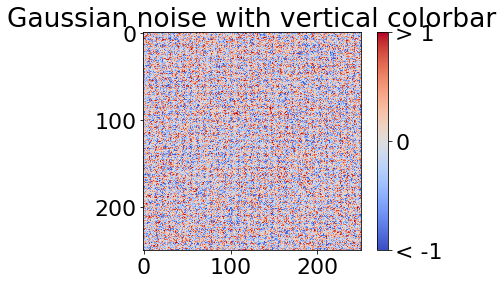

In [63]:
fig, ax = plt.subplots()

data = np.clip(randn(250, 250), -1, 1)

cax = ax.imshow(data, cmap=cm.coolwarm)
ax.set_title("Gaussian noise with vertical colorbar")

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(["< -1", "0", "> 1"])  # vertically oriented colorbar

In [64]:
station = "Leipzig"

In [65]:
# Parameters
station = "RioGrande"

## Wind measurements

In [66]:
ds_wind = read_group("wind", station, root_path)
u = read_var(ds_wind, "u0")
v = read_var(ds_wind, "v0")

u_anomalie = anomalie("day", u)

v_anomalie = anomalie("day", v)

sea_u = sea(40, station, u)
sea_u_anomalie = sea(40, station, u_anomalie)

sea_v = sea(40, station, v)
sea_v_anomalie = sea(40, station, v_anomalie)

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Zonal wind component

#### Climatology

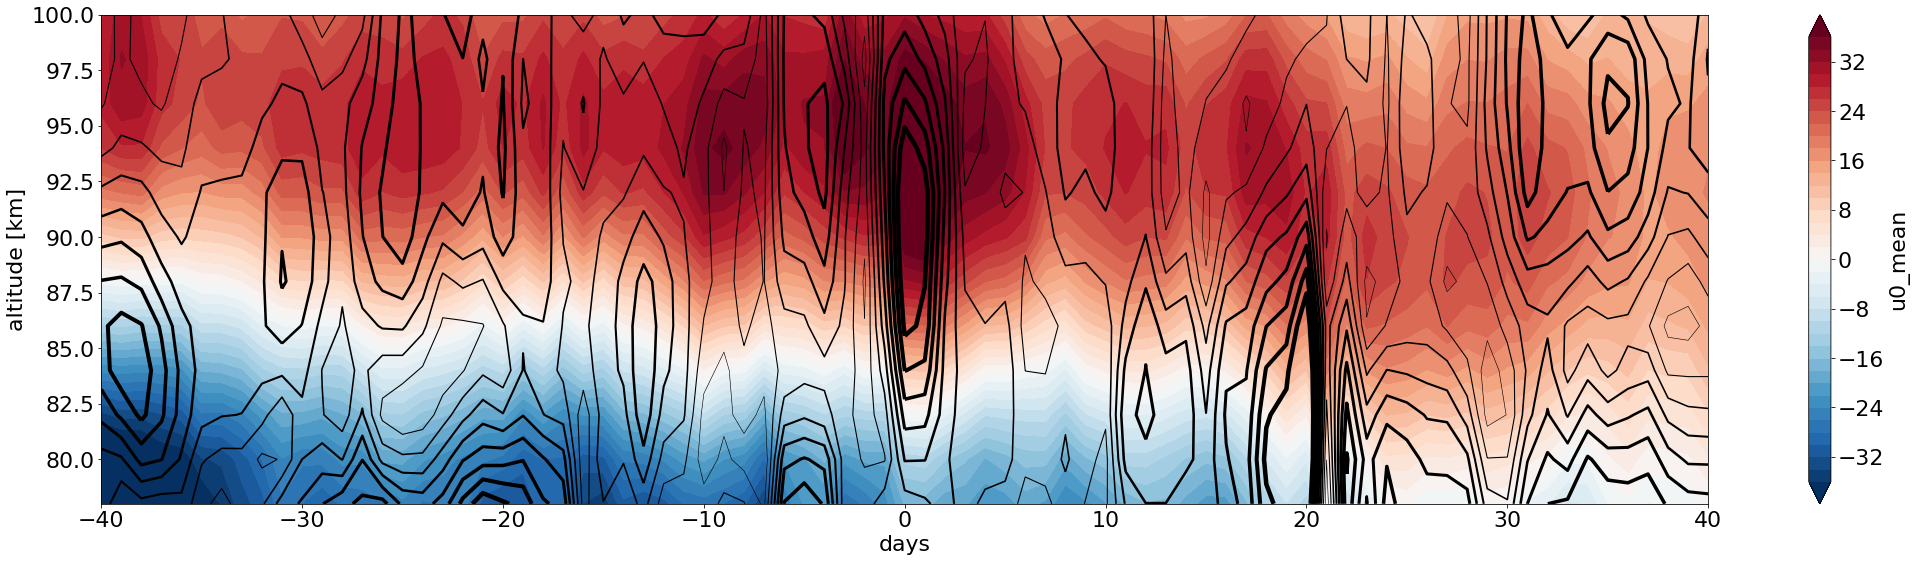

In [67]:
plotting_routine(sea_u, "u0")

#### Anomalies

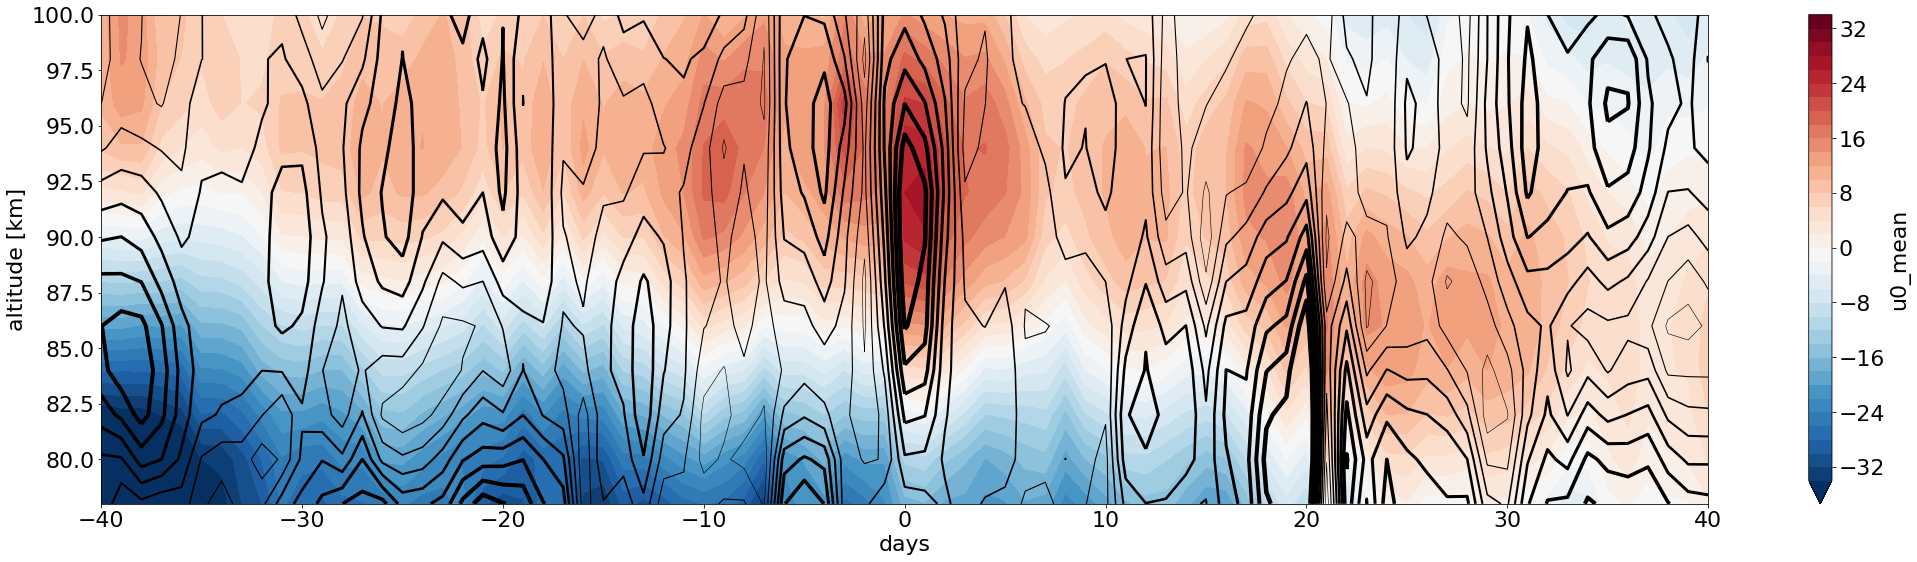

In [68]:
plotting_routine(sea_u_anomalie, "u0")

### Meridional wind component

#### Climatology

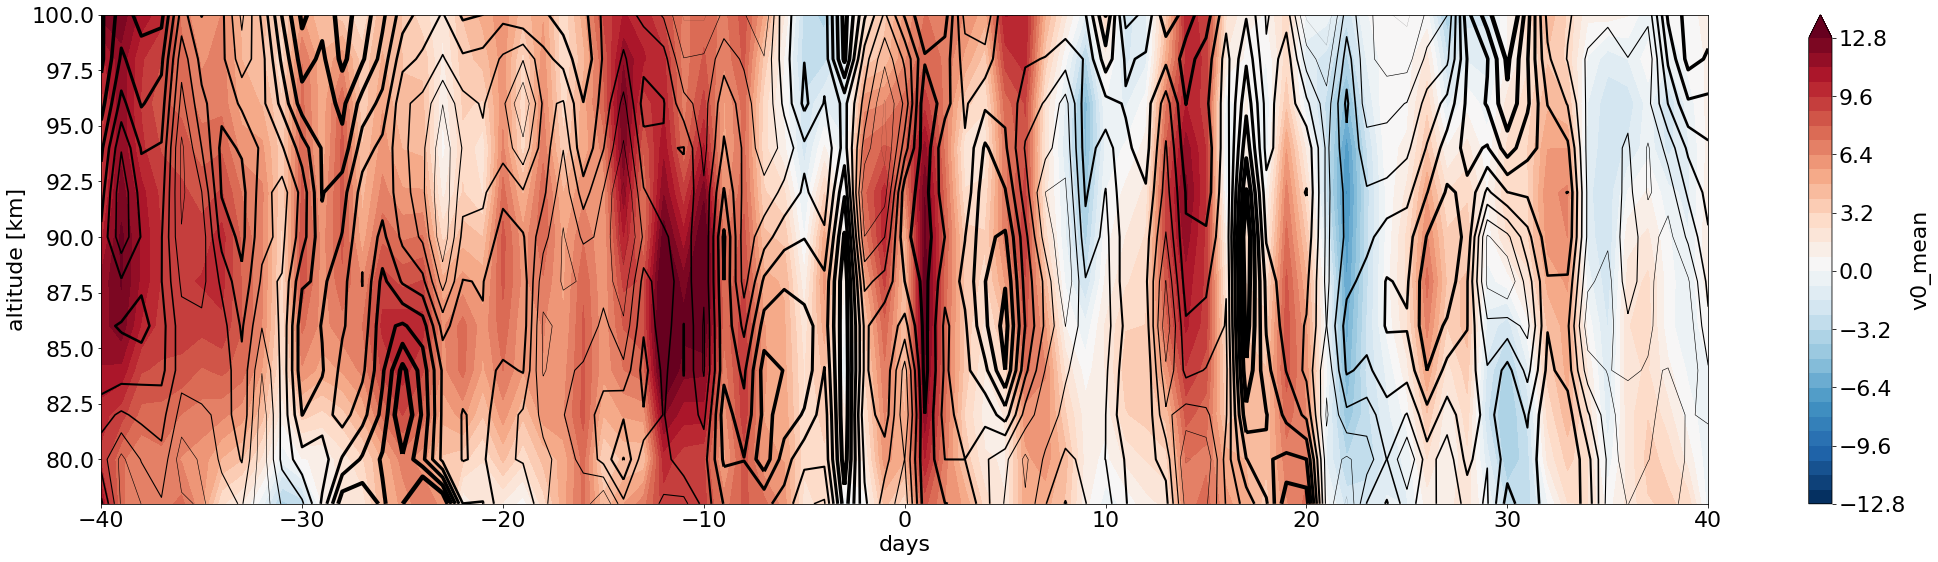

In [69]:
plotting_routine(sea_v, "v0")

#### Anomalies

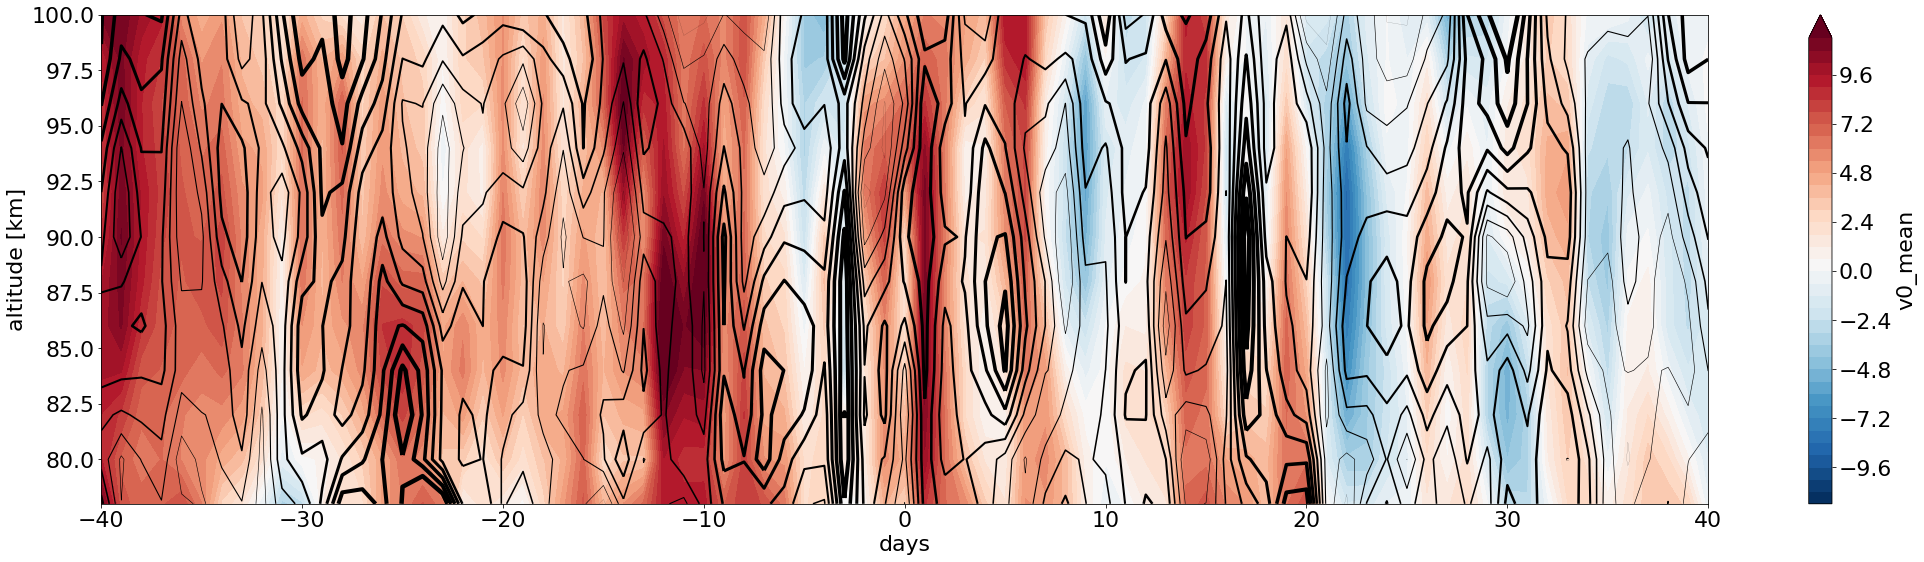

In [70]:
plotting_routine(sea_v_anomalie, "v0")

## Wave estimates

In [71]:
ds_waves = read_group("waves", station, root_path)
gw = read_var(ds_waves, "GW")
pw = read_var(ds_waves, "PW")

gw_anomalie = anomalie("day", gw)

pw_anomalie = anomalie("day", pw)

sea_gw = sea(60, station, gw)
sea_gw["name"] = "sea_gw"
sea_gw_anomalie = sea(60, station, gw_anomalie)
sea_gw_anomalie["name"] = "sea_gw_anomalie"

sea_pw = sea(60, station, pw)
sea_pw["name"] = "sea_pw"
sea_pw_anomalie = sea(60, station, pw_anomalie)
sea_pw_anomalie["name"] = "sea_pw_anomalie"

/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/hochatmstud/.conda/envs/uas/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Gravity waves

#### Climatology

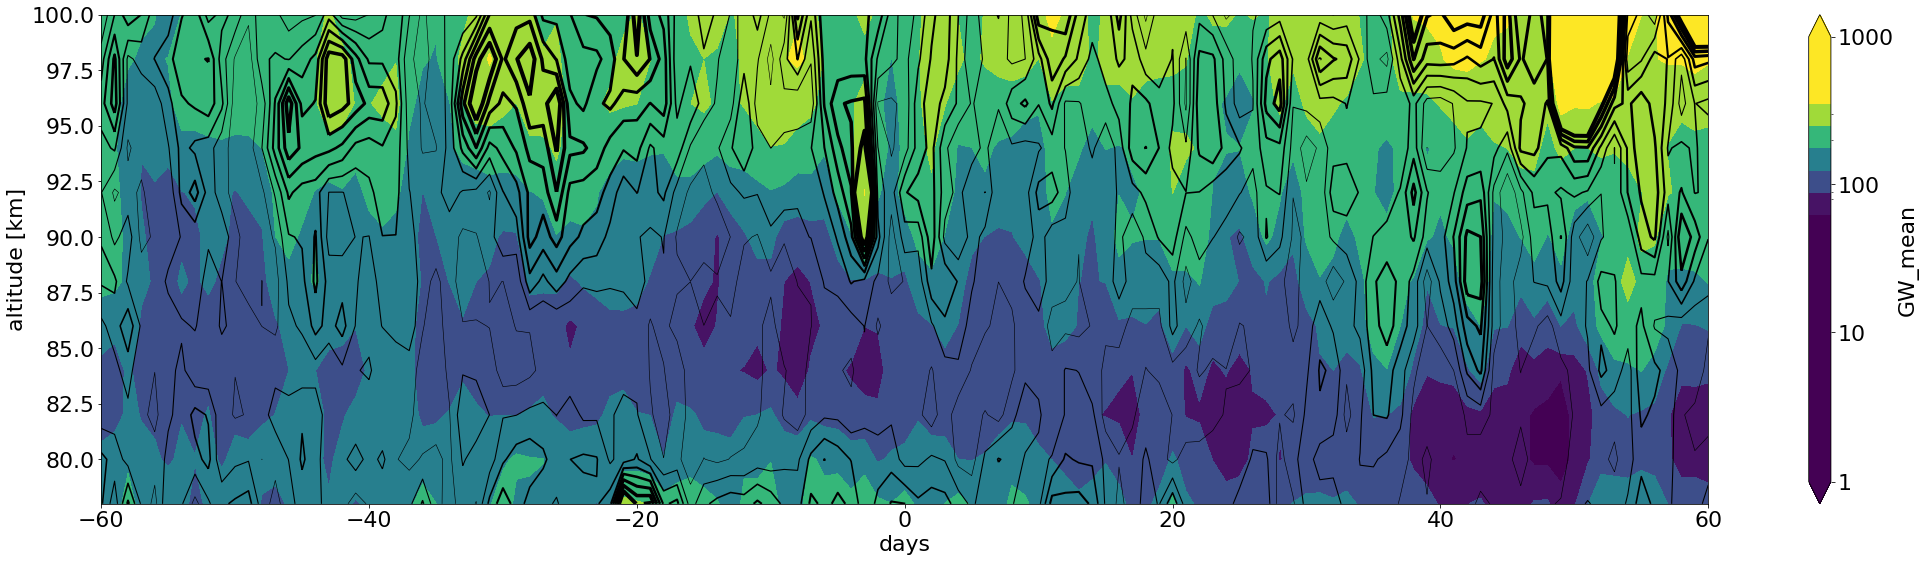

In [72]:
plotting_routine(sea_gw, "GW")

#### Anomalies

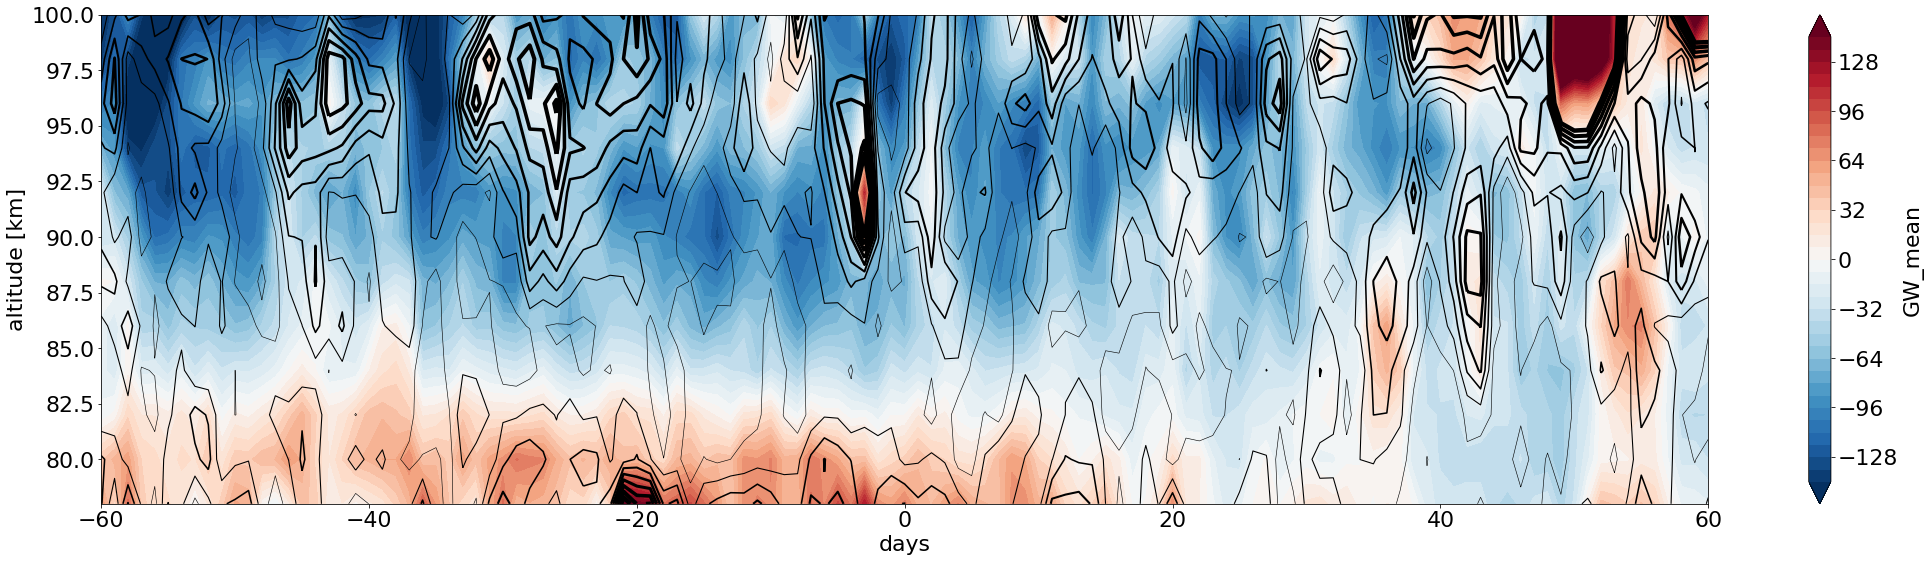

In [73]:
plotting_routine(sea_gw_anomalie, "GW")

### Planetary waves

#### Climatology

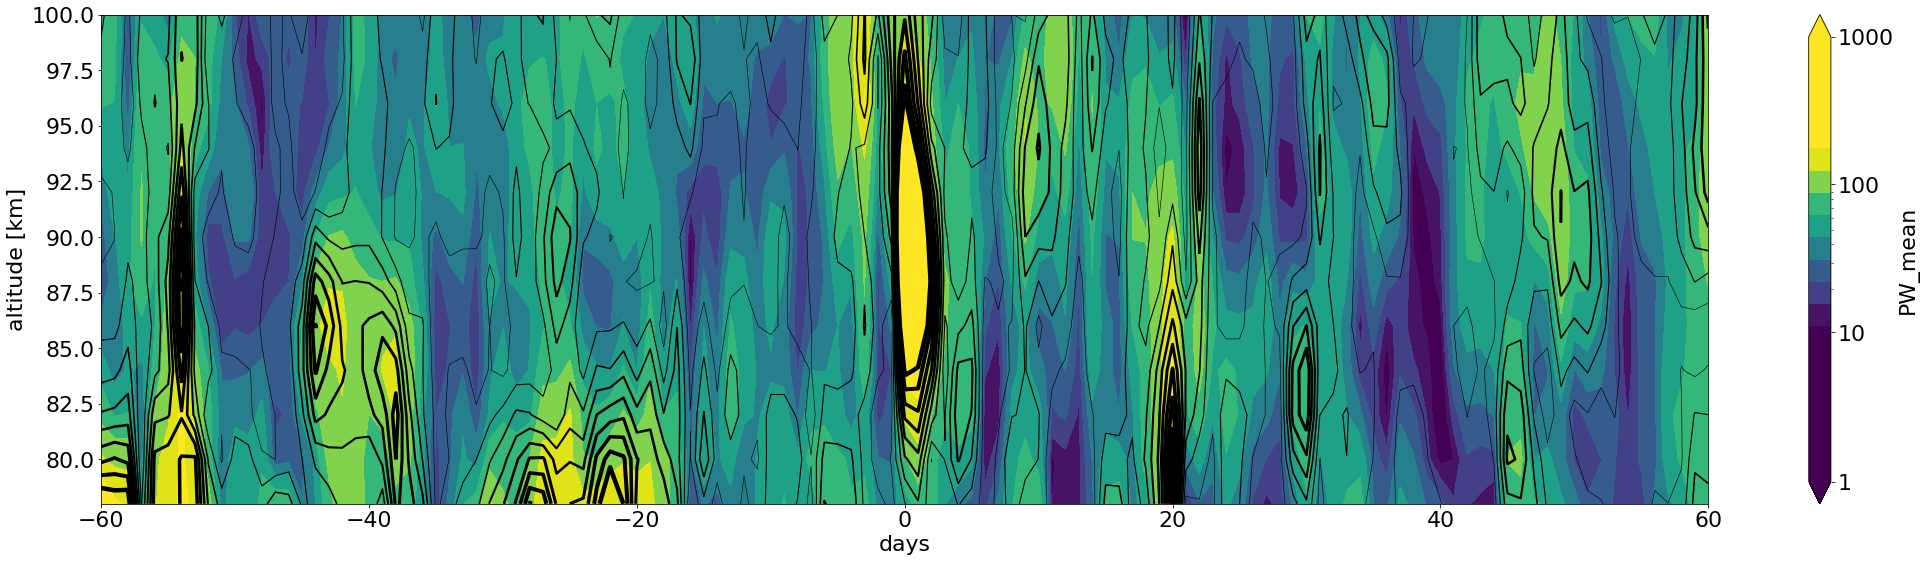

In [74]:
plotting_routine(sea_pw, "PW")

#### Anomalies

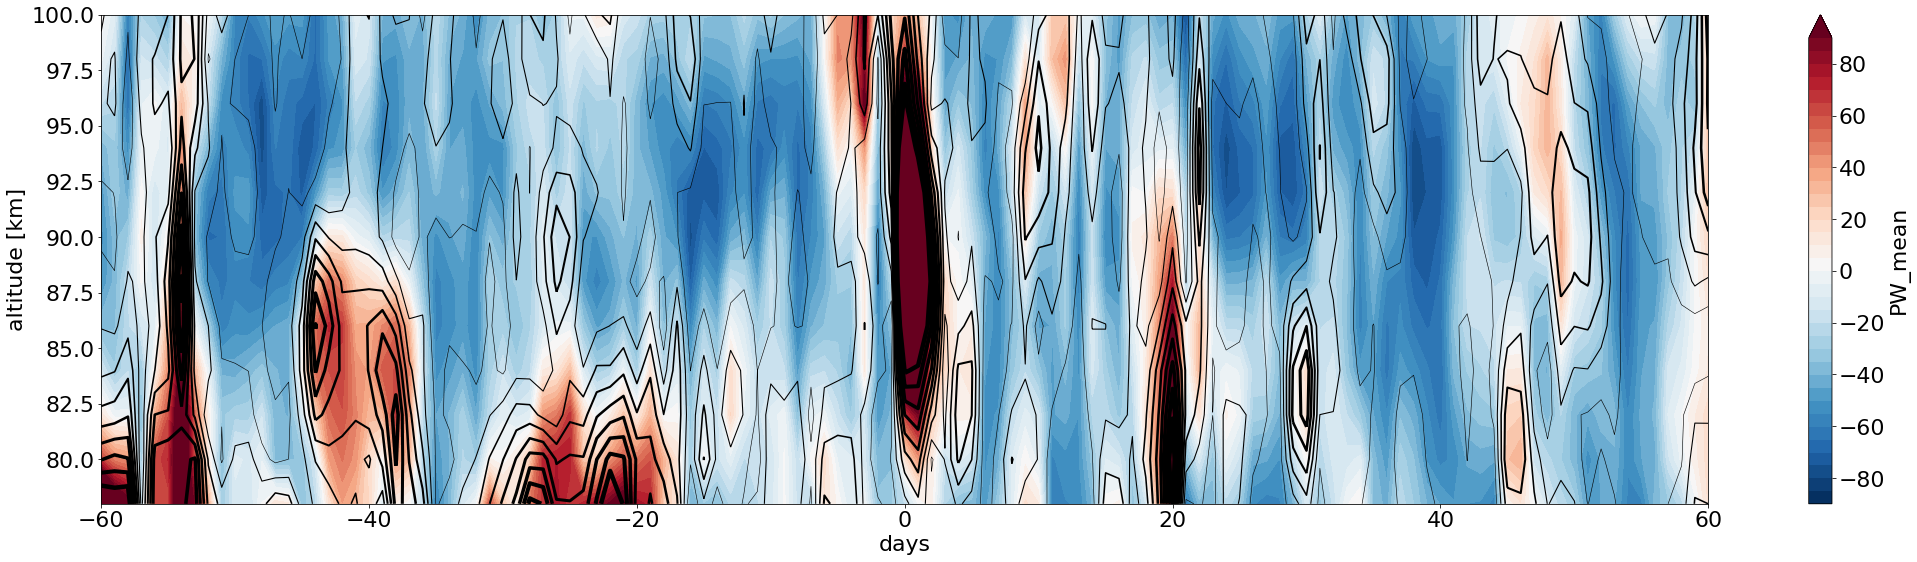

In [75]:
plotting_routine(sea_pw_anomalie, "PW")

### Individual events

In [76]:
def sea_individual(days_period, station, var):
    df_dates = pd.read_csv(
        dir_path
        + "dates/without_final_warmings/ssw_dates_displ_"
        + station
        + "_without_final_warmings.csv"
    )  # you can load SSWs from a csv file like attached
    dates = df_dates.set_index("BeginDate")

    xa_ls = []

    print(dates.index)

    for days in dates.index:

        td = pd.Timedelta(
            str(days_period) + " days"
        )  # define timedelta e.g., +/- 30 days
        comp_m = var.sel(
            time=slice(pd.to_datetime(days) - td, pd.to_datetime(days) + td)
        )  # select the data in the time range around the SSW onset
        comp_m["time"] = np.linspace(
            -days_period, days_period, comp_m.time.shape[0]
        )  # set the time dimension of comp_m to an array of +/- the period
        xa_ls.append(comp_m)  # xa_ls is an array of the datasets of all single events

    xa_comp = xr.concat(
        xa_ls, dim="event"
    )  # assign 'event' as new dimension to the data array --> new array xa_comp
    xa_comp[
        "event"
    ] = (
        dates.index.values
    )  # xa_comp has now the dimension 'event' and the values of this dimension are the indices of dates (i.e. the dates of the SSW onsets)

    return xa_comp

In [77]:
sea_u_rio_individual = sea_individual(40, "Rio", u)
sea_u_rio_individual_anomalie = sea_individual(40, "Rio", u_anomalie)

sea_v_rio_individual = sea_individual(40, "Rio", v)
sea_v_rio_individual_anomalie = sea_individual(40, "Rio", v_anomalie)

Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')
Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')
Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')
Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')


In [78]:
sea_u_rio_individual

<xarray.DataArray 'u0' (event: 4, time: 81, alt: 26)>
array([[[ -5.58 , -12.93 , -18.25 , ...,     nan,     nan,     nan],
        [ -5.58 ,  -9.33 , -14.05 , ...,     nan,     nan,     nan],
        [ -5.58 ,  -3.575, -14.92 , ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,  -9.65 , ...,     nan,     nan,     nan],
        [    nan,     nan,  -9.075, ...,     nan,     nan,     nan],
        [    nan,     nan,  -9.075, ...,     nan,     nan,     nan]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]]])
Coordinates:
  * time     (time) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
  * alt      (alt) float64 70.0 72.0 74.0 76.0 78.0 ... 114.0 116.0 118.0 120.0
  * event    (event) object '2009-01-24' '2010-02-09' '2013-01-06' '2018-02-12'
Attributes:
    zonal wind:  zonal / m/s

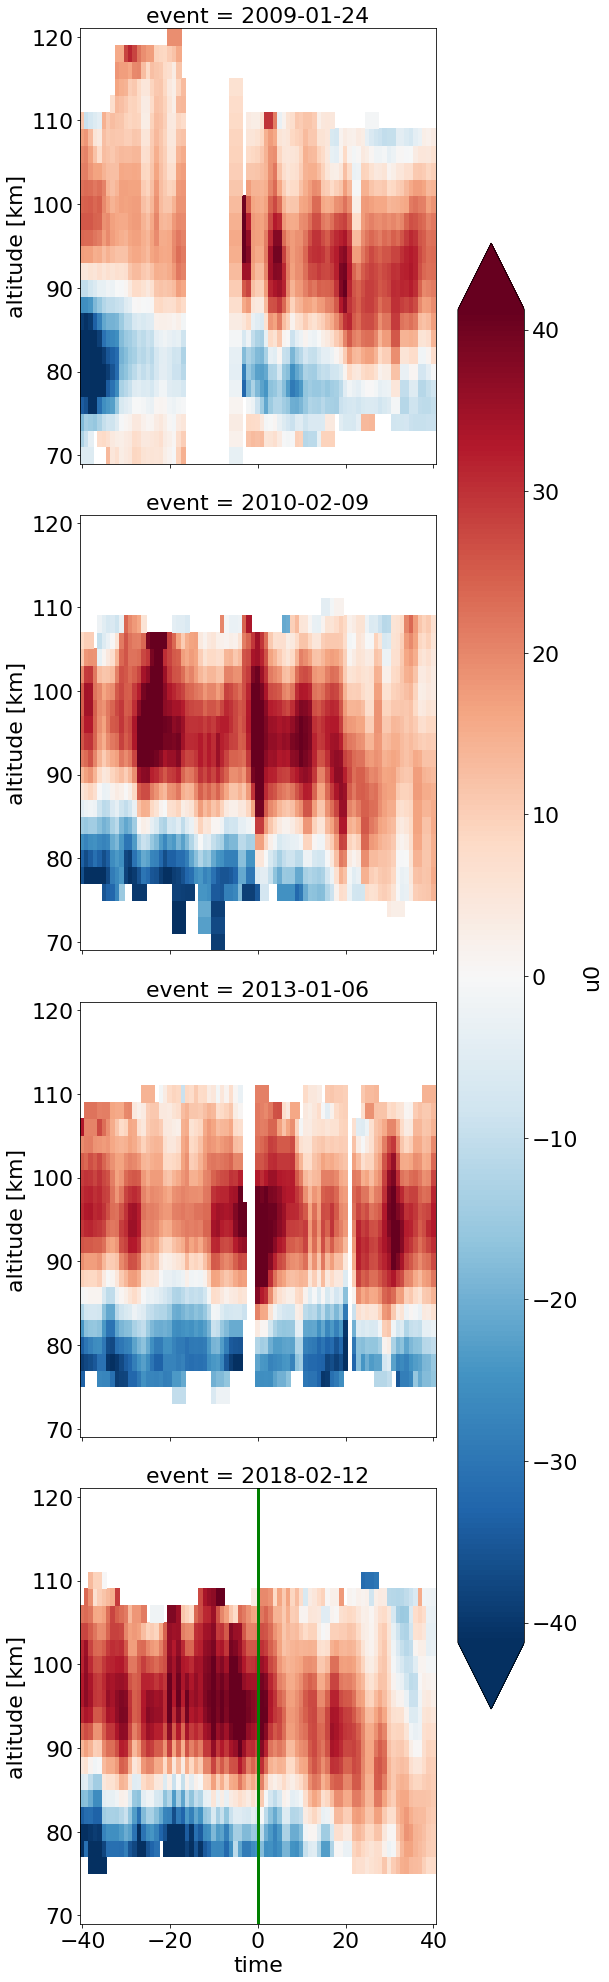

In [79]:
sea_u_rio_individual.plot(x="time", row="event", robust=True, size=7)
plt.vlines(0, 60, 130, color="g", lw=3)

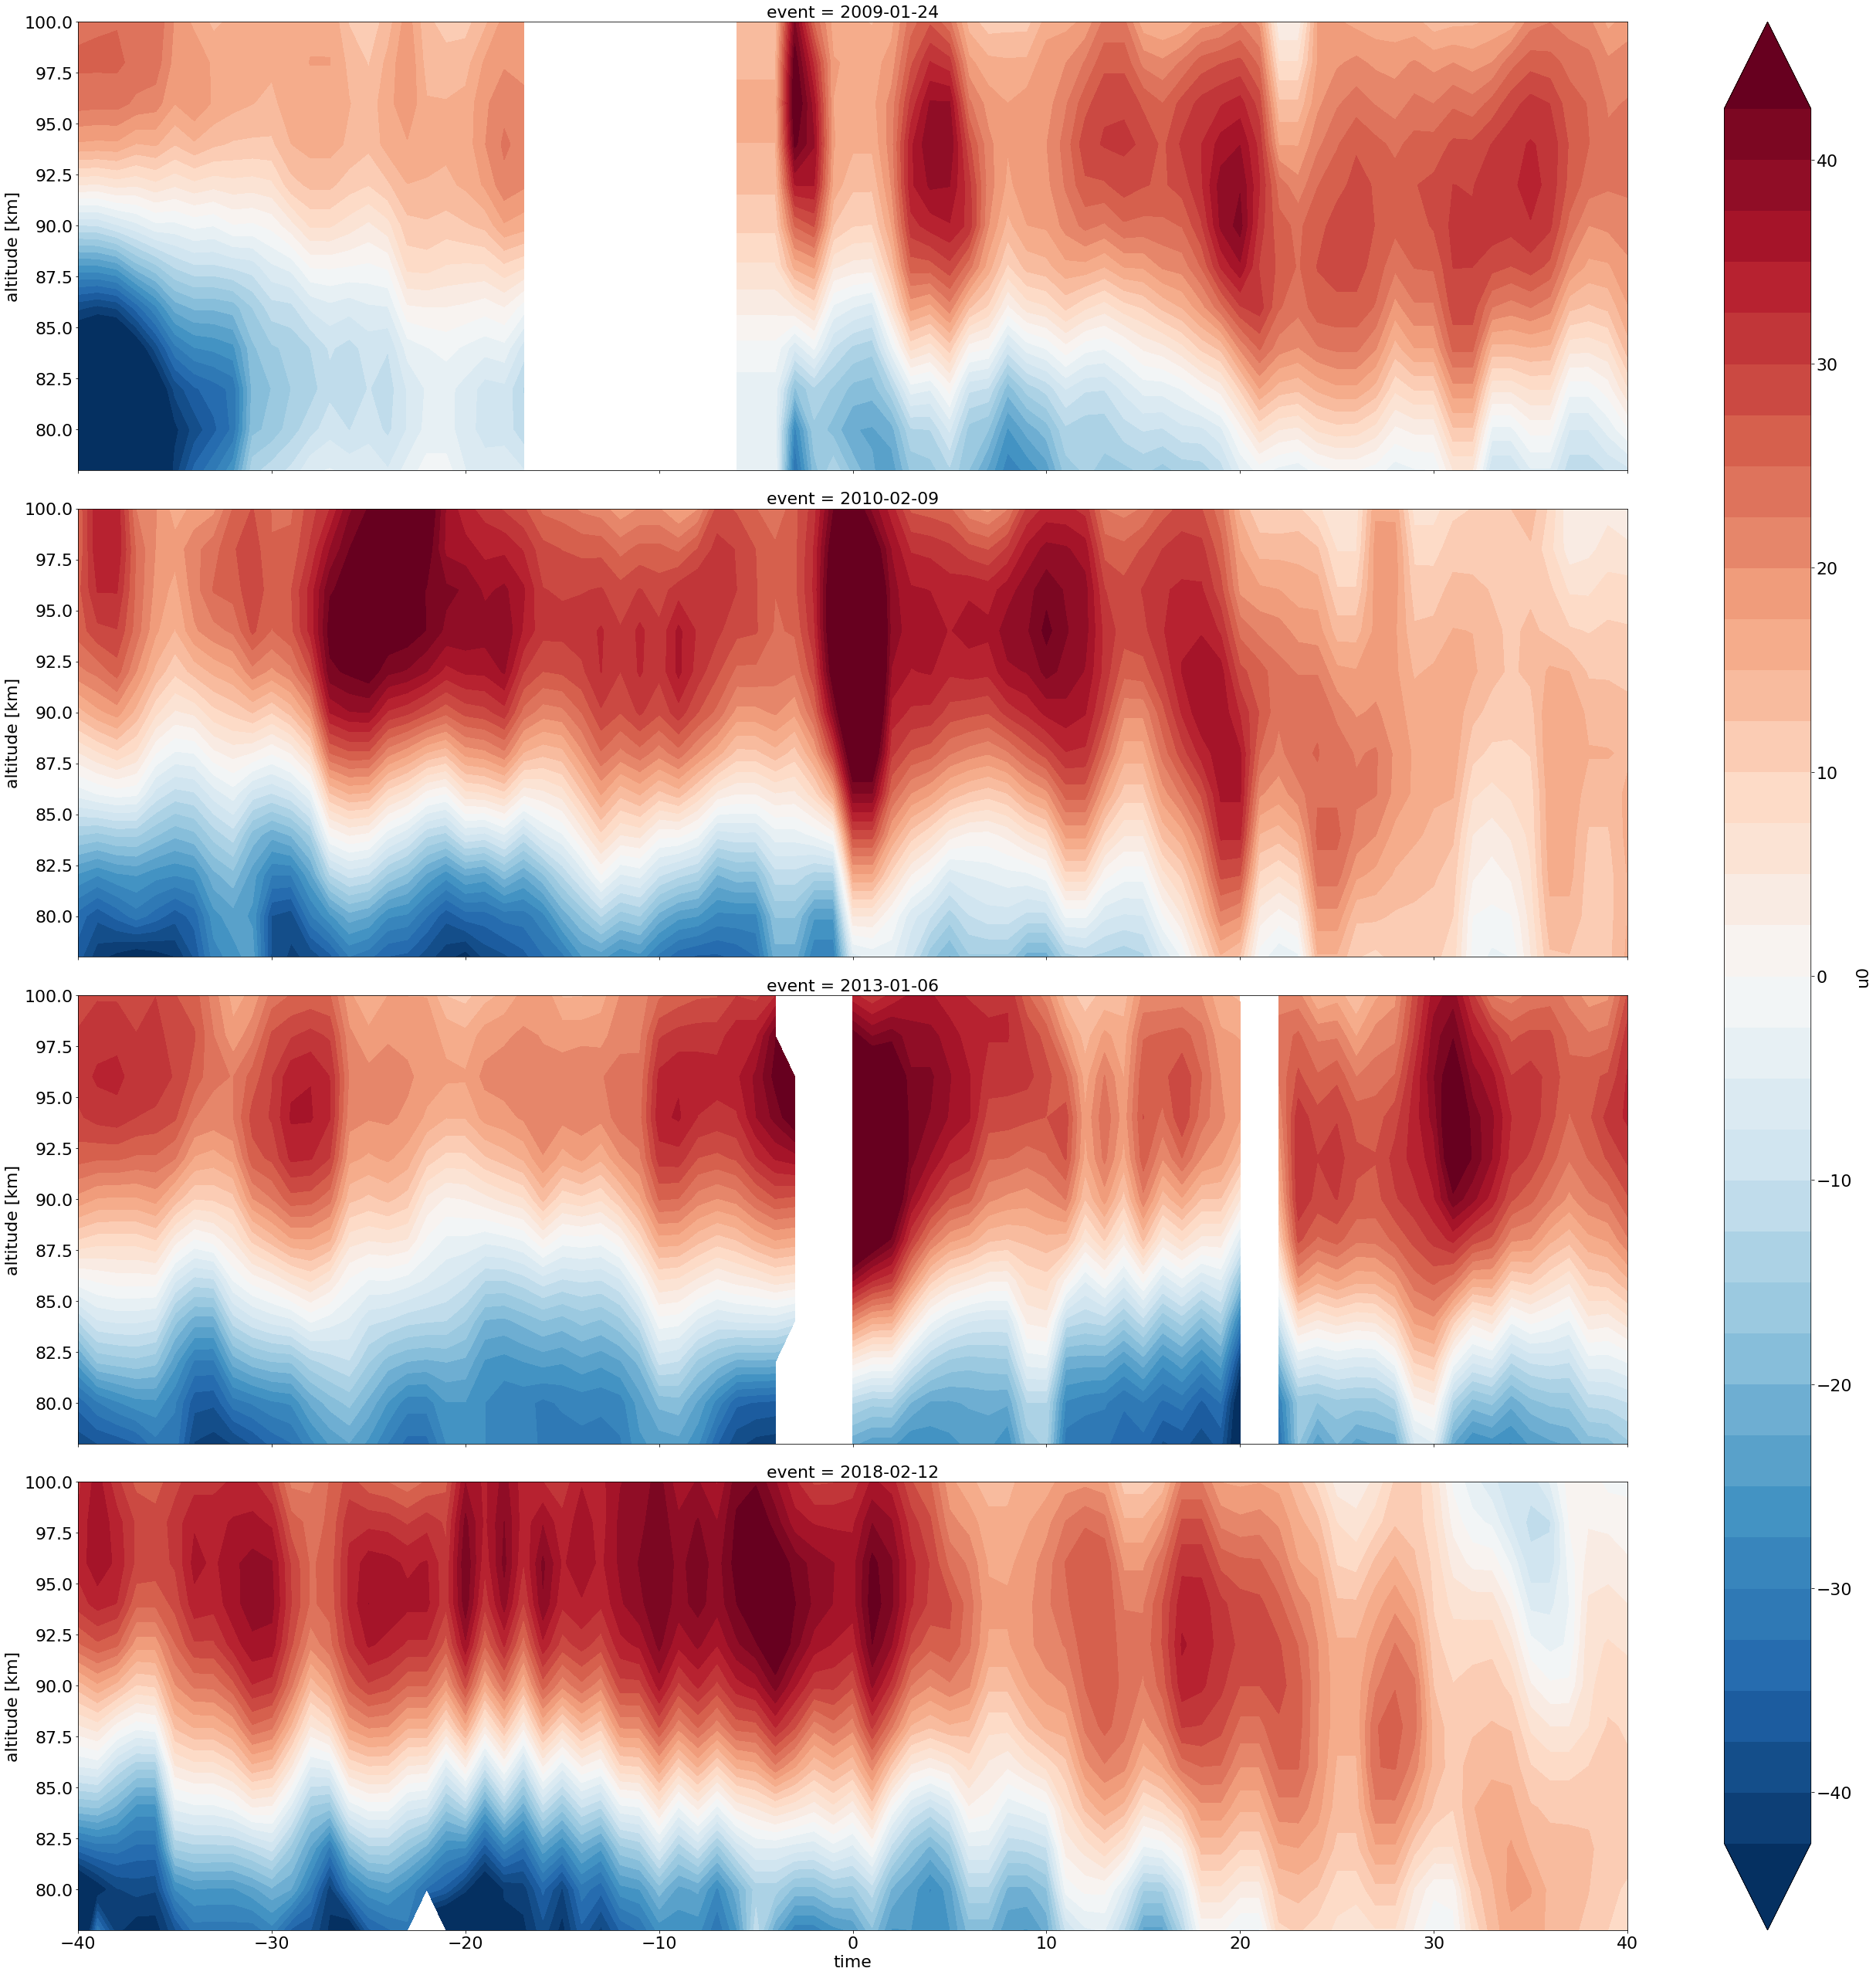

In [80]:
p = sea_u_rio_individual.sel(alt=slice(77, 101)).plot.contourf(
    x="time", row="event", size=9, robust=True, levels=41, aspect=4
)

In [81]:
sea_v_rio_individual

<xarray.DataArray 'v0' (event: 4, time: 81, alt: 26)>
array([[[-10.01 ,   4.31 ,   5.21 , ...,     nan,     nan,     nan],
        [-10.01 ,  -5.11 ,   2.28 , ...,     nan,     nan,     nan],
        [-10.01 ,  -9.375,   2.05 , ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,   4.62 , ...,     nan,     nan,     nan],
        [    nan,     nan,   1.985, ...,     nan,     nan,     nan],
        [    nan,     nan,   1.985, ...,     nan,     nan,     nan]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]],

       [[    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        ...,
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan],
        [    nan,     nan,     nan, ...,     nan,     nan,     nan]]])
Coordinates:
  * time     (time) float64 -40.0 -39.0 -38.0 -37.0 ... 37.0 38.0 39.0 40.0
  * alt      (alt) float64 70.0 72.0 74.0 76.0 78.0 ... 114.0 116.0 118.0 120.0
  * event    (event) object '2009-01-24' '2010-02-09' '2013-01-06' '2018-02-12'
Attributes:
    merid wind:  merid / m/s

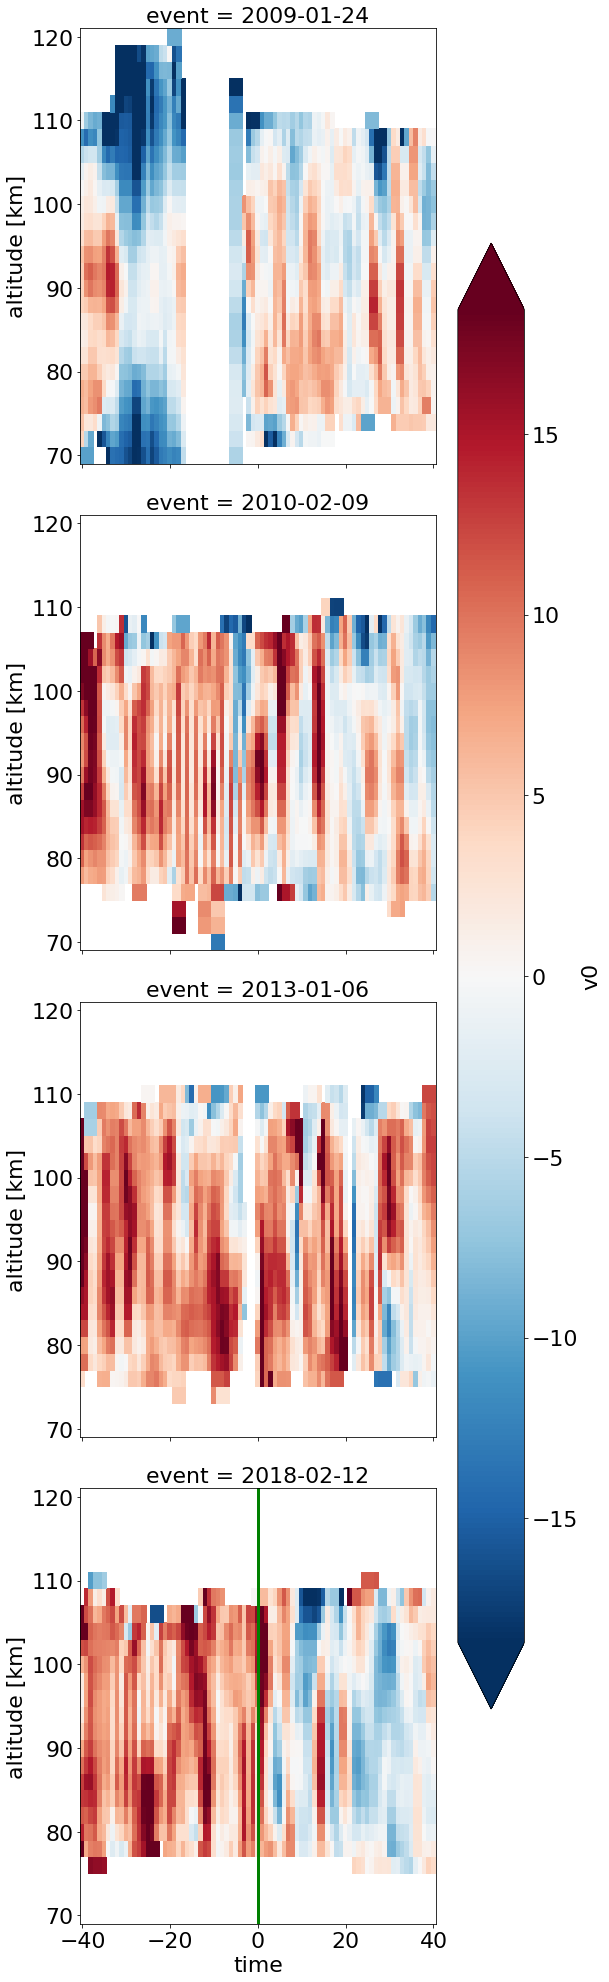

In [82]:
sea_v_rio_individual.plot(x="time", row="event", robust=True, size=7)
plt.vlines(0, 60, 130, color="g", lw=3)

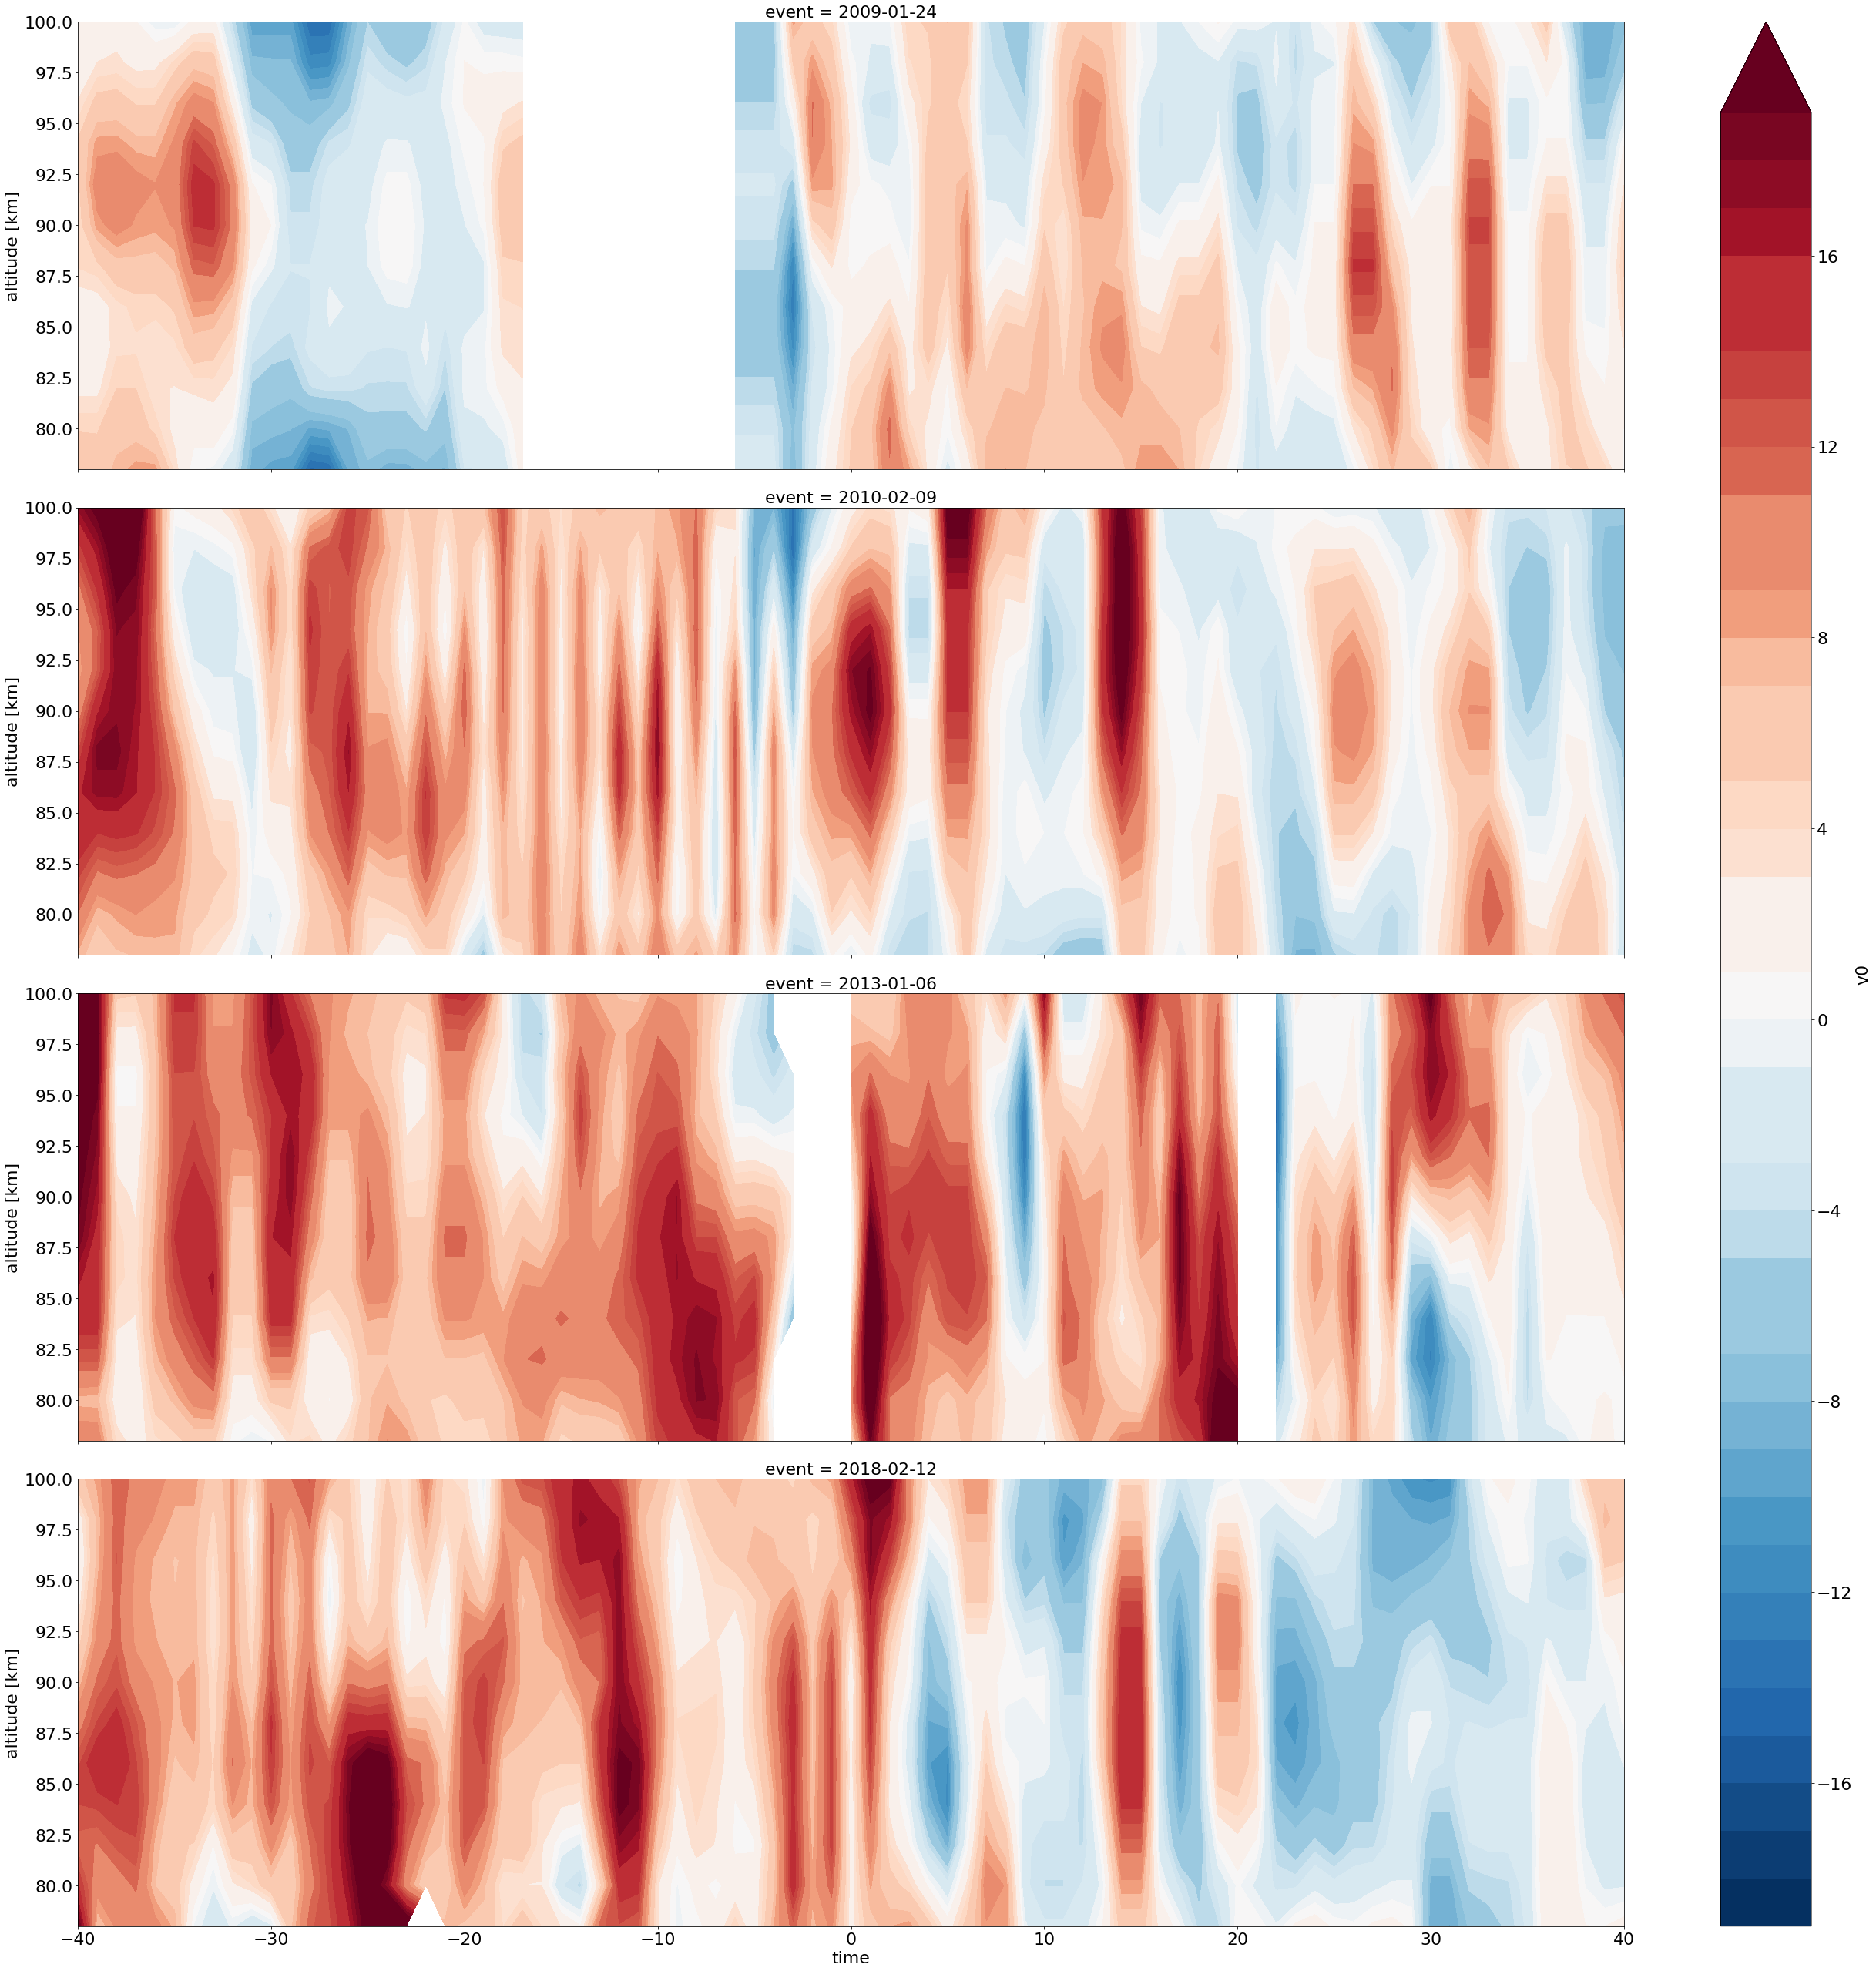

In [83]:
p = sea_v_rio_individual.sel(alt=slice(77, 101)).plot.contourf(
    x="time", row="event", size=9, robust=True, levels=41, aspect=4
)

In [96]:
sea_gw_rio_individual = sea_individual(60, "Rio", gw)
sea_gw_rio_individual_anomalie = sea_individual(60, "Rio", gw_anomalie)

sea_pw_rio_individual = sea_individual(60, "Rio", pw)
sea_pw_rio_individual_anomalie = sea_individual(60, "Rio", pw_anomalie)

Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')
Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')
Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')
Index(['2009-01-24', '2010-02-09', '2013-01-06', '2018-02-12'], dtype='object', name='BeginDate')


In [97]:
sea_gw_rio_individual

<xarray.DataArray 'GW' (event: 4, time: 121, alt: 26)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [202.02750225, 157.81538525, 185.4678985 , ..., 321.0823485 ,
         286.2530485 ,          nan],
        ...,
        [         nan,          nan,  84.300964  , ...,          nan,
                  nan,          nan],
        [         nan,          nan, 113.5905785 , ...,          nan,
                  nan,          nan],
        [         nan,          nan,  76.97916725, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan, 167.37738425, ...,          nan,
                  nan,          nan],
        [         nan,          nan, 167.37738425, ...,          nan,
                  nan,          nan],
        [         nan,          nan, 127.6946165 , ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * time     (time) float64 -60.0 -59.0 -58.0 -57.0 ... 57.0 58.0 59.0 60.0
  * alt      (alt) float64 70.0 72.0 74.0 76.0 78.0 ... 114.0 116.0 118.0 120.0
  * event    (event) object '2009-01-24' '2010-02-09' '2013-01-06' '2018-02-12'
Attributes:
    GW energy:  GW energy / m^2/s^2

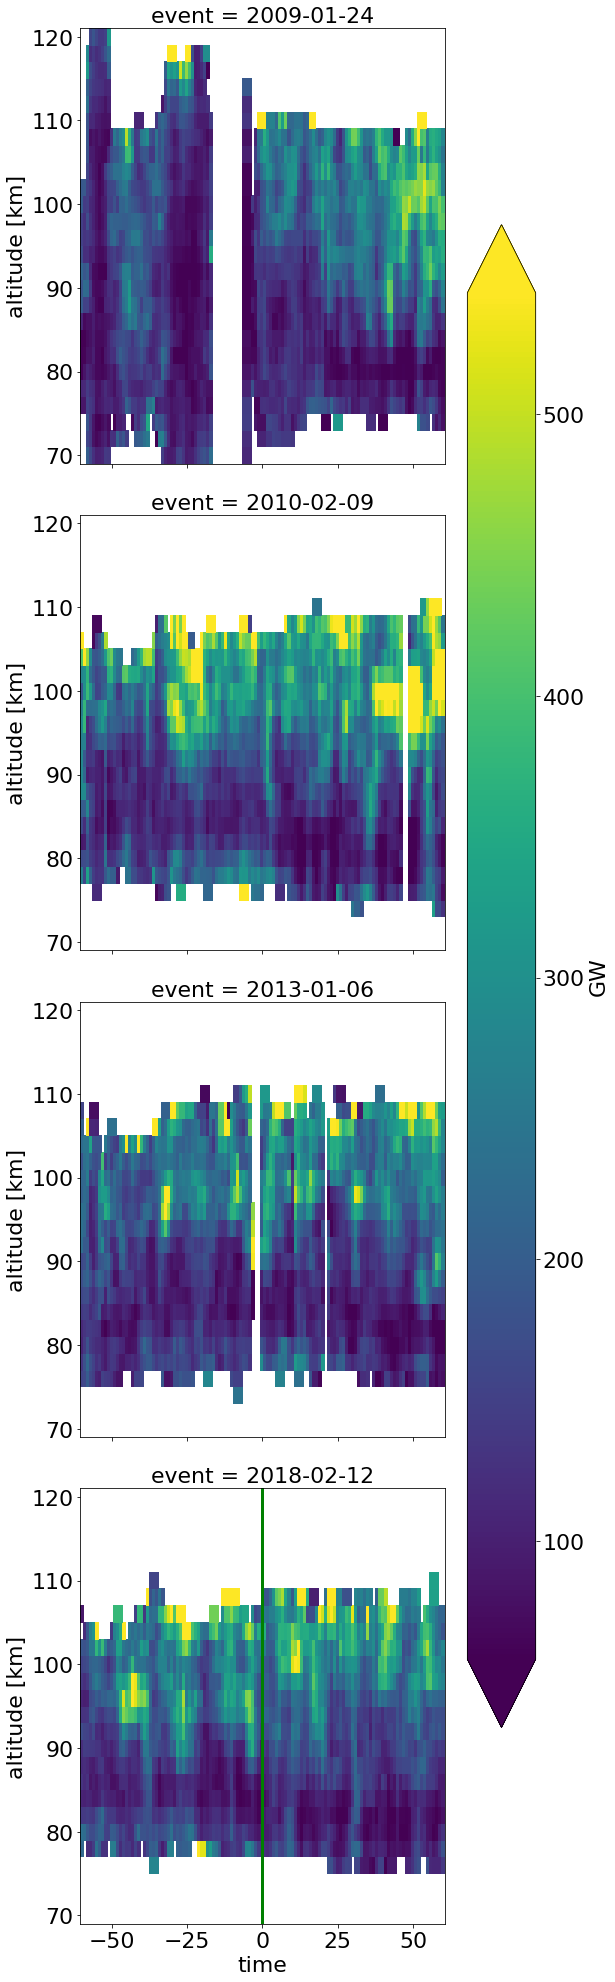

In [98]:
sea_gw_rio_individual.plot(x="time", row="event", robust=True, size=7)
plt.vlines(0, 60, 130, color="g", lw=3)

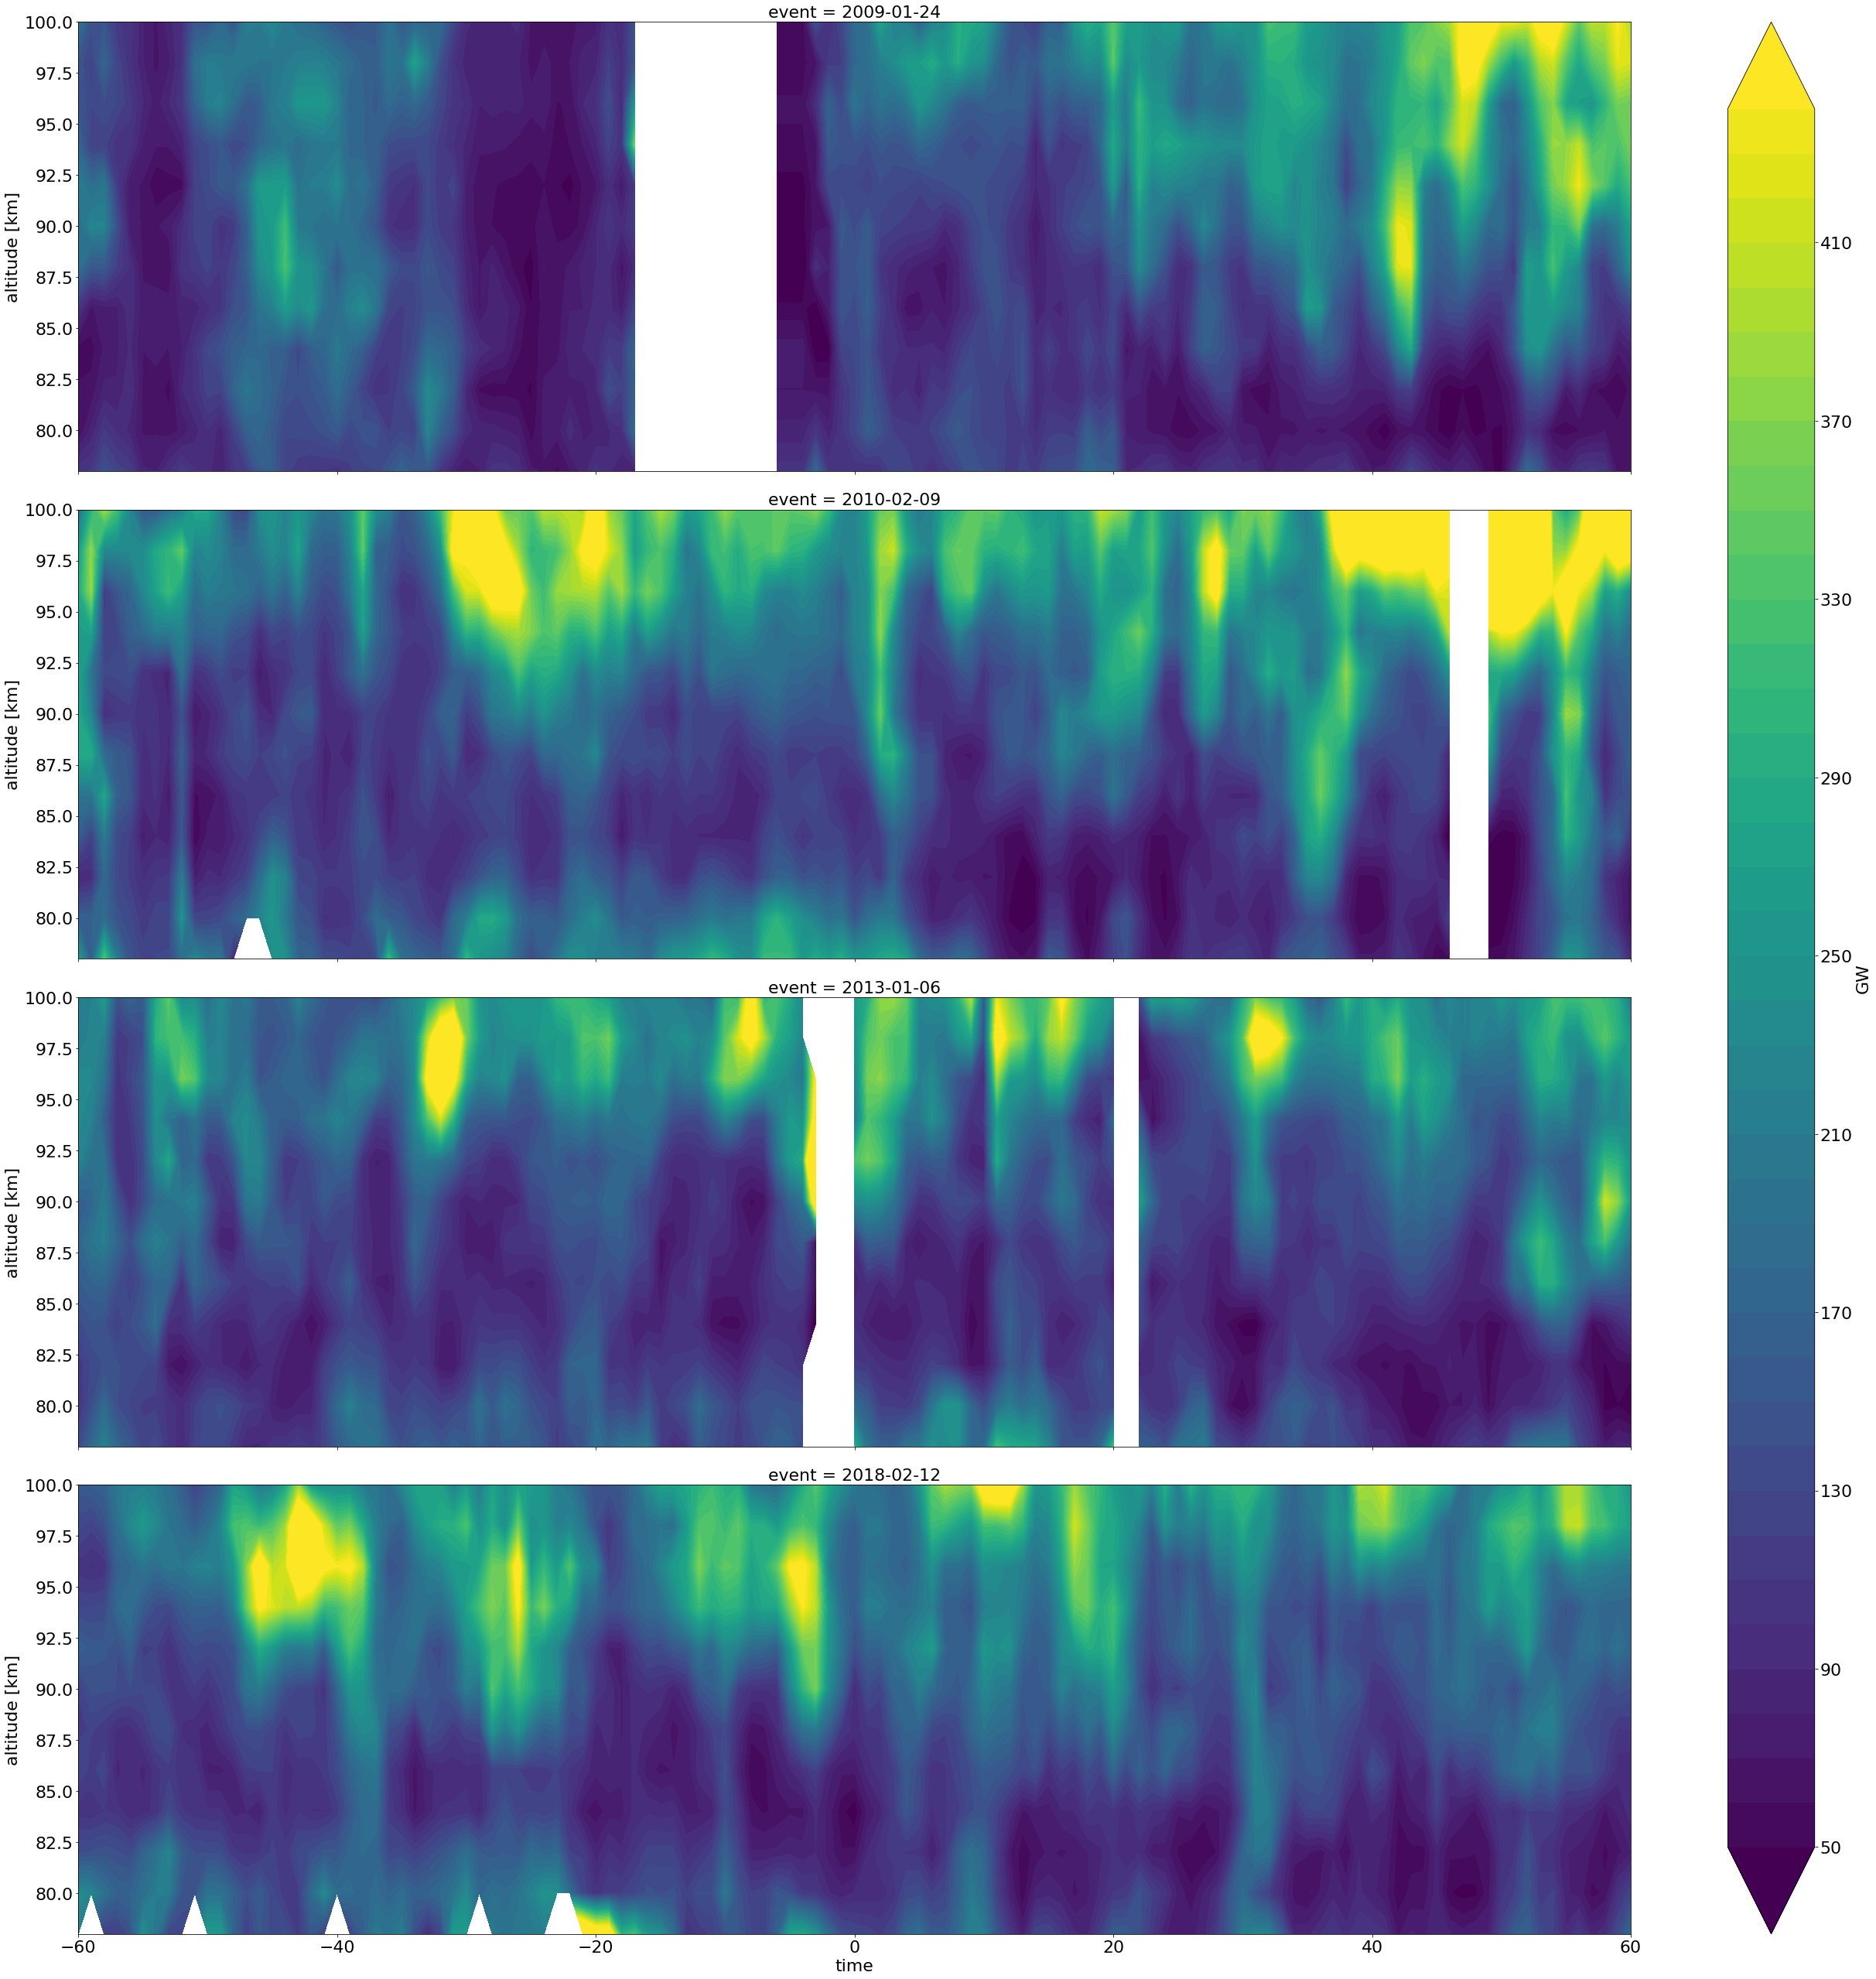

In [99]:
p = sea_gw_rio_individual.sel(alt=slice(77, 101)).plot.contourf(
    x="time", row="event", size=9, robust=True, levels=41, aspect=4
)

In [100]:
sea_pw_rio_individual

<xarray.DataArray 'PW' (event: 4, time: 121, alt: 26)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 -60.0 -59.0 -58.0 -57.0 ... 57.0 58.0 59.0 60.0
  * alt      (alt) float64 70.0 72.0 74.0 76.0 78.0 ... 114.0 116.0 118.0 120.0
  * event    (event) object '2009-01-24' '2010-02-09' '2013-01-06' '2018-02-12'
Attributes:
    PW energy:  PW energyl / m^2/s^2

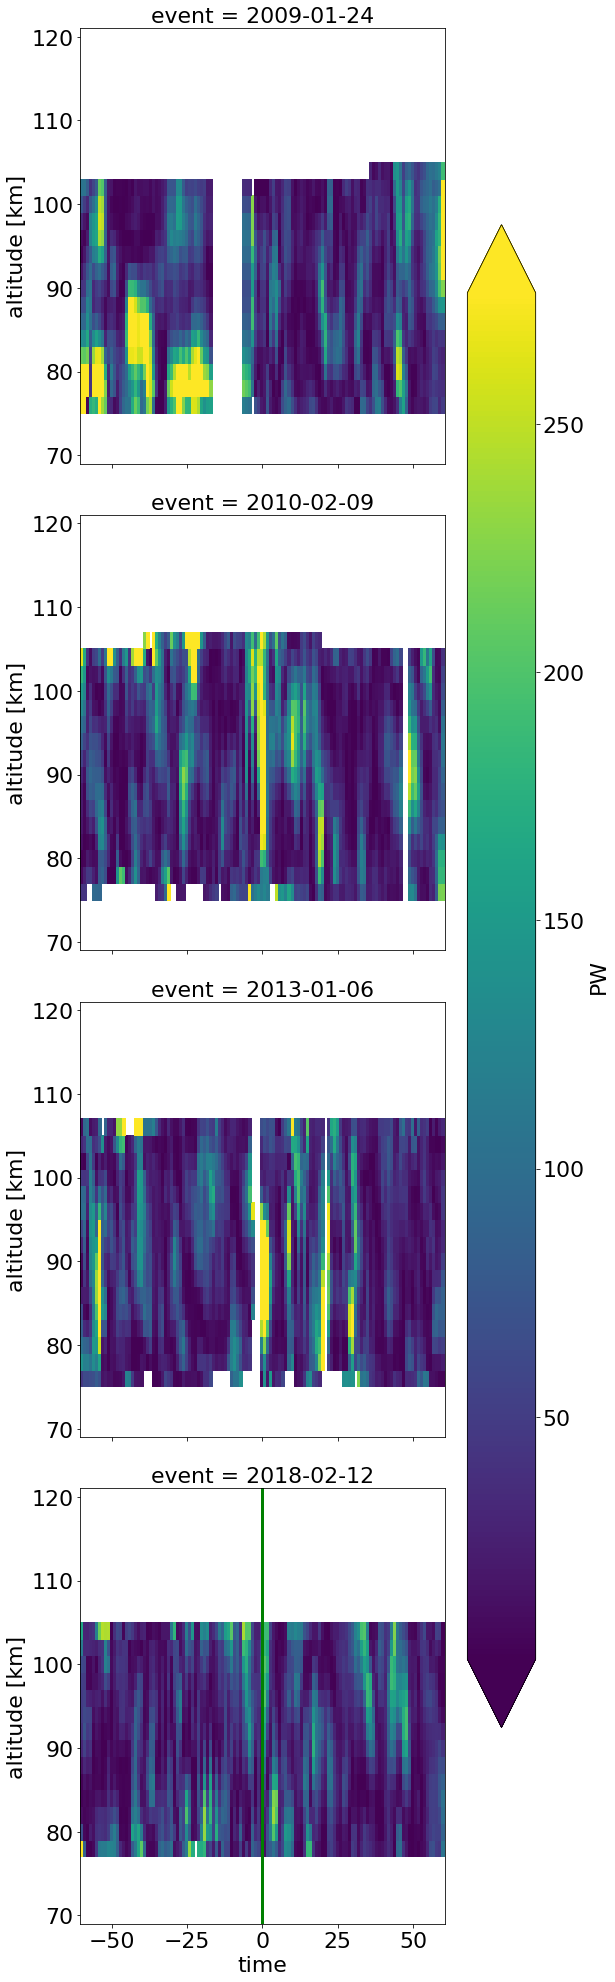

In [101]:
sea_pw_rio_individual.plot(x="time", row="event", robust=True, size=7)
plt.vlines(0, 60, 130, color="g", lw=3)

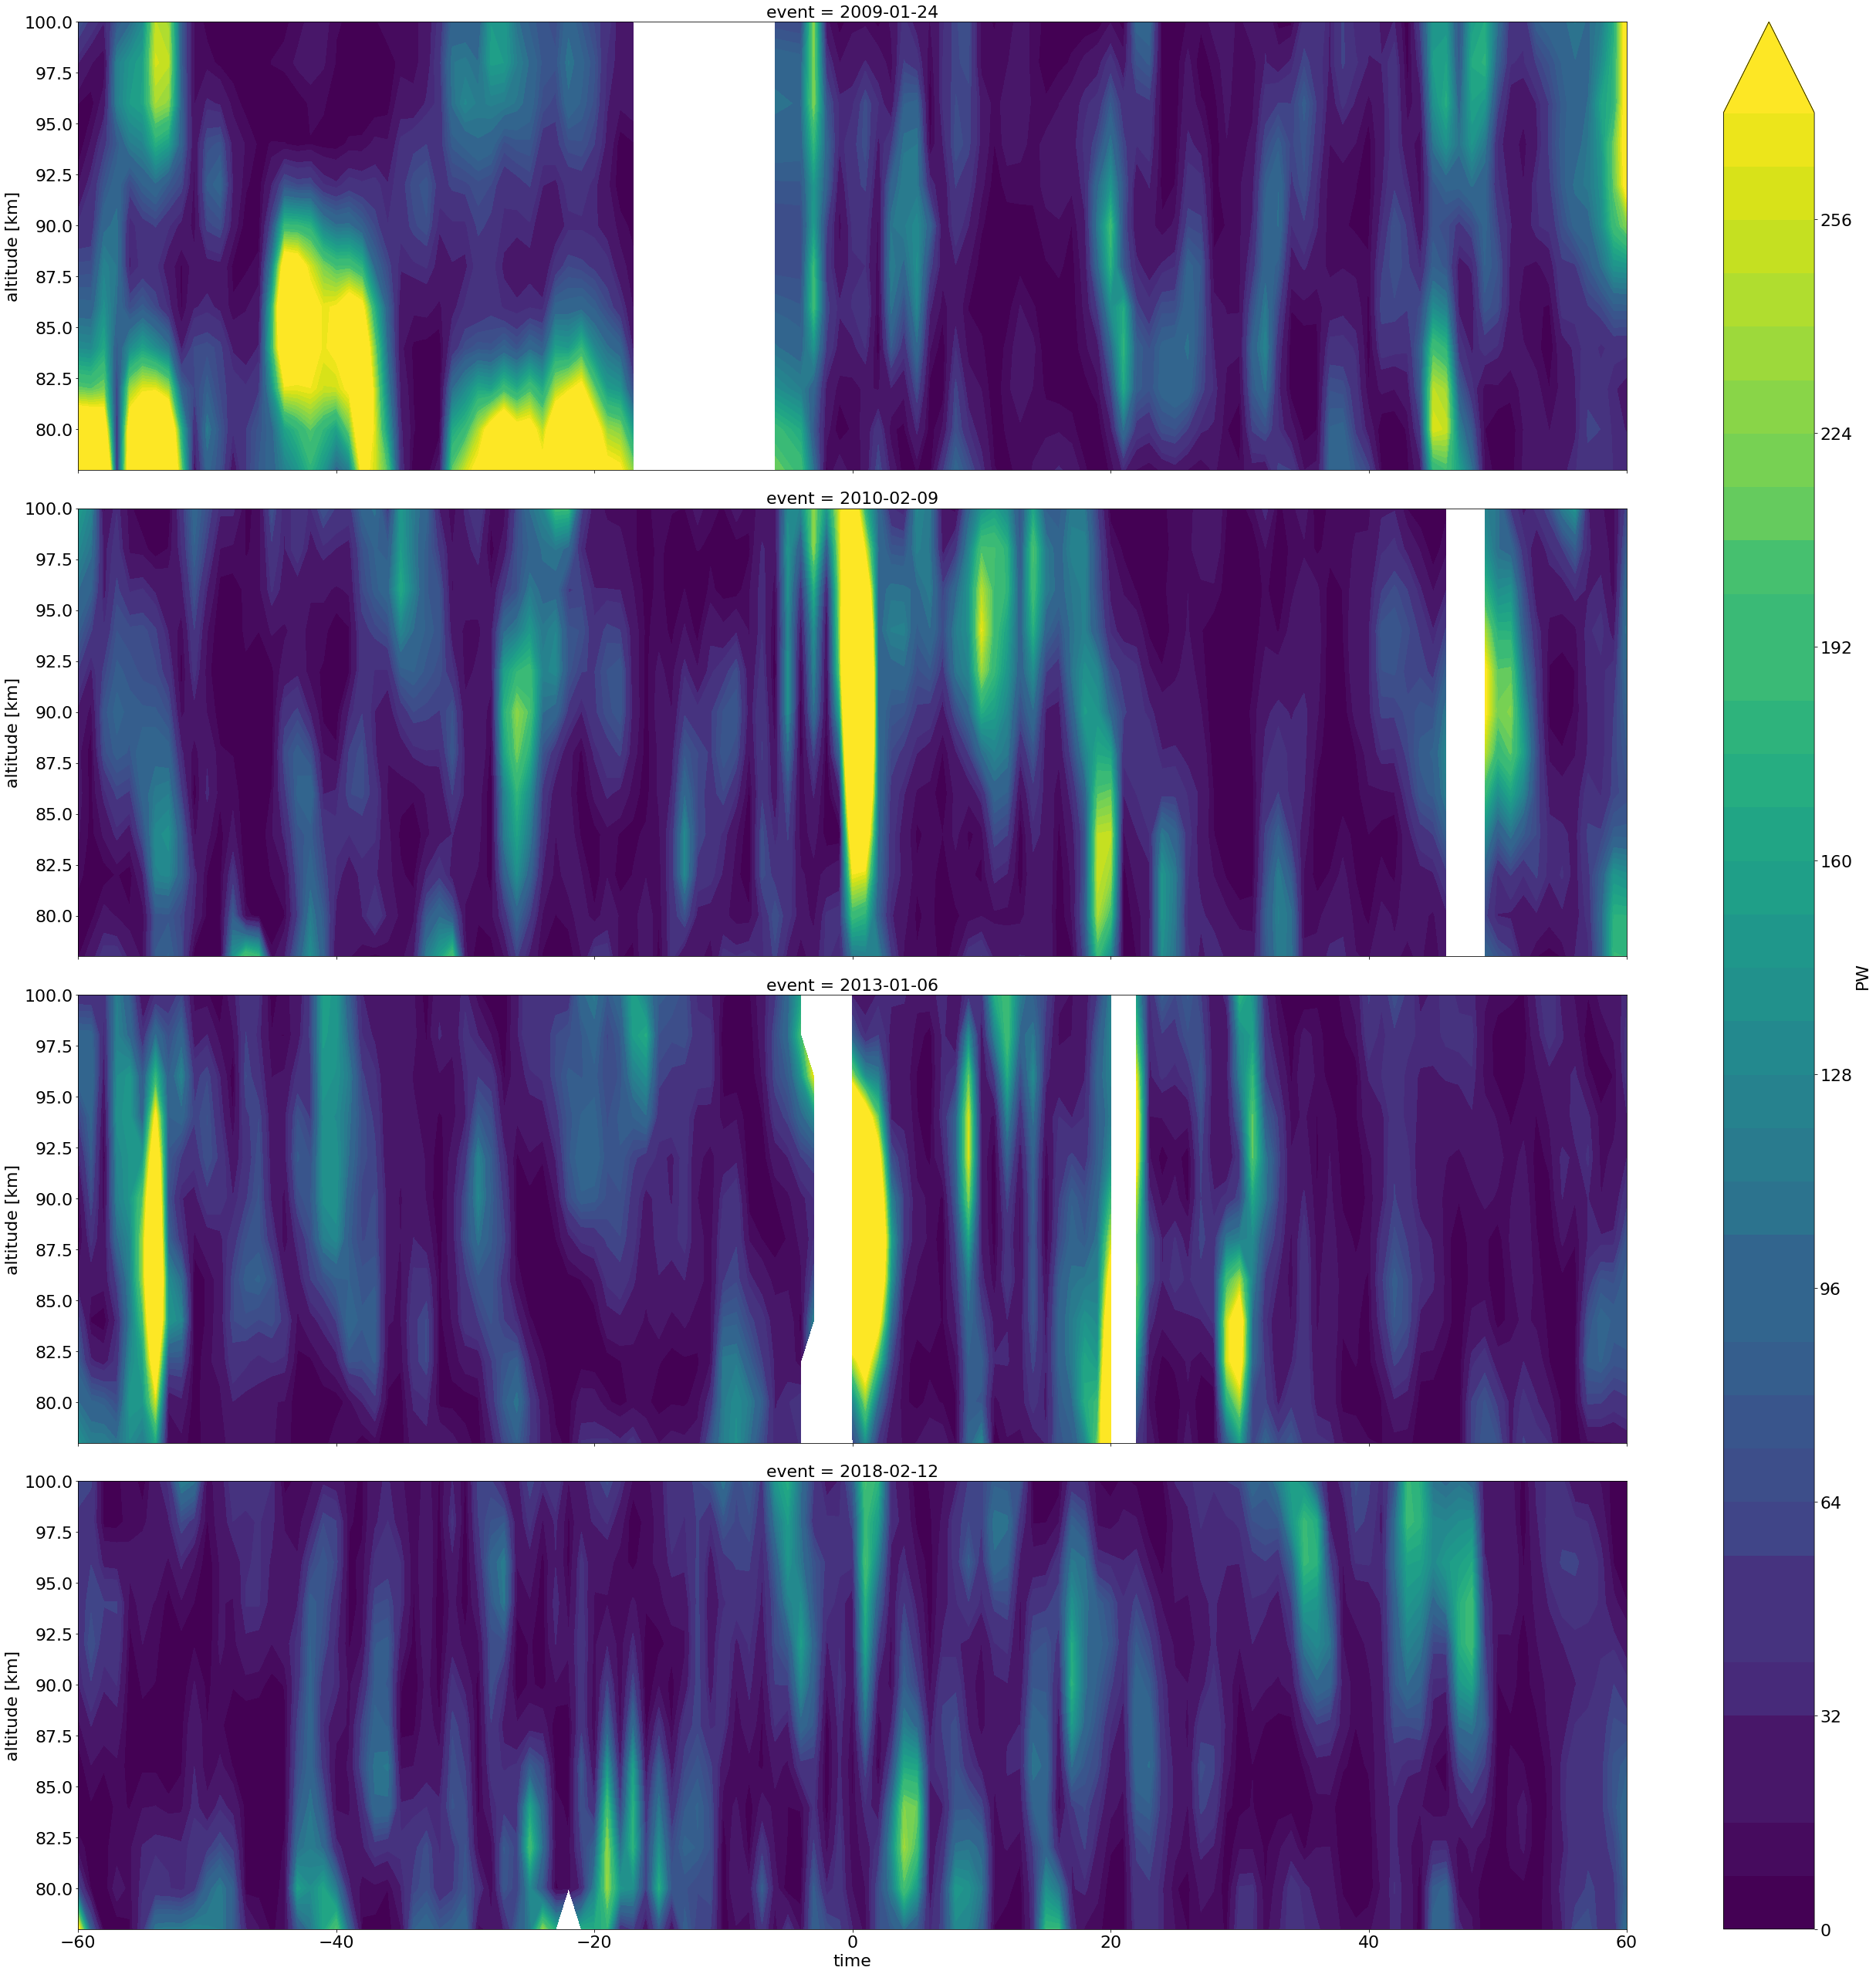

In [102]:
p = sea_pw_rio_individual.sel(alt=slice(77, 101)).plot.contourf(
    x="time", row="event", size=9, robust=True, levels=41, aspect=4
)